In [1]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="bball tourney"
)

Normalized schema I developed based off several datasets provided from my database class.
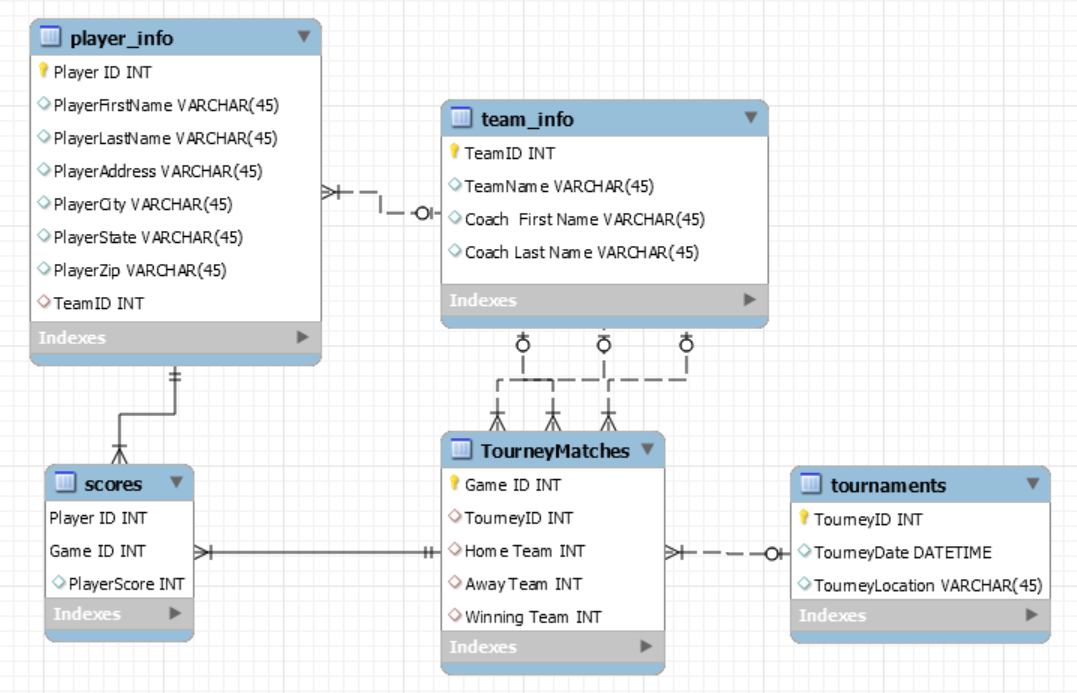

In [2]:
# Display all players and their address formatted suitably for a mailing list, sorted by zip code
mycursor = mydb.cursor()        

mycursor.execute('SELECT CONCAT(PlayerFirstname," ",playerlastname) name,  \
CONCAT(playeraddress,", ",playercity,", ",playerstate," ",playerzip) address \
FROM `bball tourney`.player_info order by playerzip;'

)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('Kathryn Patterson', '16 Maple Lane, Auburn, WA 98002')
('Ann Patterson', '16 Maple Lane, Auburn, WA 98002')
('Neil Patterson', '16 Maple Lane, Auburn, WA 98002')
('Bill Peterson', '603 Connection, Frisco, WA 98002')
('Steve Smity', '160 Elm Street, Auburn, WA 98002')
('Rachel Patterson', '16 Maple Lane, Auburn, WA 98002')
('Megan Patterson', '16 Maple Lane, Auburn, WA 98002')
('Carol Viescas', '16345 NE 32nd Street, Bellevue, WA 98004')
('Richard Sheskey', '17950 N 59th, Seattle, WA 98011')
('Sara Sheskey', '17950 N 59th, Seattle, WA 98011')
('Sarah Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('William Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('Mary Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('Michael Hernandez', '47 Harvard Drive, Kirkland, WA 98033')
('Steve Pundt', '722 Moss Bay Blvd., Kirkland, WA 98033')
('Josey Lane', '227  Bay Moss, Kandy, WA 98033')
('Kendra Hernandez', '47 Harvard Drive, Kirkland, WA 98033')
('Kevin Murray', '154 Oklah

In [3]:
# Show tournaments IDs that have not been played yet

mycursor.execute('SELECT tourneyid FROM tournaments \
WHERE NOT EXISTS ( \
SELECT * FROM tourneymatches WHERE \
tournaments.tourneyid = tourneymatches.tourneyid);'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(18,)
(19,)


In [4]:
# Display name of top 10 scorers (Players who scored highest) along with their score

mycursor.execute('SELECT playerfirstname, playerlastname, sum(PlayerScore) AS total_score  \
FROM scores JOIN player_info On scores.playerID = player_info.playerID \
GROUP BY scores.playerID ORDER BY total_score DESC LIMIT 10;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('John', 'Kennedy', Decimal('267'))
('Sarah', 'Thompson', Decimal('258'))
('David', 'Viescas', Decimal('245'))
('Kathryn', 'Patterson', Decimal('244'))
('Neil', 'Patterson', Decimal('234'))
('Steve', 'Pundt', Decimal('233'))
('Caleb', 'Viescas', Decimal('230'))
('Rachel', 'Patterson', Decimal('225'))
('David', 'Cunningham', Decimal('206'))
('Mary', 'Thompson', Decimal('200'))


In [5]:
# Display players’ names along with their highest score 

mycursor.execute('SELECT playerfirstname, playerlastname, MAX(PlayerScore) AS total_score \ 
FROM scores JOIN player_info On scores.playerID = player_info.playerID \
GROUP BY scores.playerID;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

SyntaxError: EOL while scanning string literal (<ipython-input-5-4b7183cce6b1>, line 3)

In [ ]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="salesorders"
)

In [ ]:
# List the CUSTOMERS who have purchased a bike but not a helmet
mycursor = mydb.cursor()        

mycursor.execute("SELECT distinct concat(CustFirstName,' ', CustLastName) NAME \
FROM customers WHERE customers.CustomerID IN ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details \
on orders.OrderNumber = order_details.OrderNumber join products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 2) and customers.CustomerID NOT IN ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID JOIN order_details \
on orders.OrderNumber = order_details.OrderNumber JOIN products \
on order_details.ProductNumber = products.ProductNumber WHERE \
ProductName LIKE '%HELMET');"
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

In [ ]:
#Show the customer ORDERS that have a bike but do not have a helmet

mycursor.execute("SELECT DISTINCT ordernumber FROM order_details AS X \
JOIN products on X.ProductNumber = products.ProductNumber \
WHERE categoryID = 2 AND NOT EXISTS ( \
SELECT * FROM order_details AS Y \
JOIN products on Y.ProductNumber = products.ProductNumber \
WHERE ProductName LIKE '%HELMET' AND \
X.ordernumber = y.ordernumber) LIMIT 10;" #I limited to 10 orders for the sake of space
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

In [ ]:
# Display the customers and their orders that have a bike and a helmet in the same order

mycursor.execute("SELECT CustFirstName, CustLastName, X.OrderNumber \
FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details AS X \
on orders.OrderNumber = X.OrderNumber join products \
on X.ProductNumber = products.ProductNumber  \
WHERE categoryID = 2 AND EXISTS ( \
SELECT * FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details AS Y \
on orders.OrderNumber = Y.OrderNumber join products \
on Y.ProductNumber = products.ProductNumber  \
WHERE ProductName LIKE '%HELMET' \
AND X.ordernumber = y.ordernumber) LIMIT 10;" #I limited to 10 orders for the sake of space
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

In [ ]:
# Display the customers who have never ordered bikes or tires
mycursor.execute("SELECT distinct concat(CustFirstName,' ',CustLastName) NAME \
FROM customers WHERE customers.CustomerID not in ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details \
on orders.OrderNumber = order_details.OrderNumber join products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 2) and customers.CustomerID NOT in ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID JOIN order_details \
on orders.OrderNumber = order_details.OrderNumber JOIN products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 6);"
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

In [ ]:
#mycursor.close()